# Selección del dataset

Para construir el algoritmo utilizaremos un conjunto de datos que está dentro de la librería de scikit learn.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from sklearn import decomposition,svm
from PIL import Image
import cv2

In [2]:
data = datasets.fetch_lfw_people()
data.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

El conjunto de datos es "Labeled Faces in the Wild" se trata de un conjunto de imagenes con caras de famosos que fueron recolectadas en la web. La base de datos esta diseñada para estudiar el problema del reconocimiento facial.

Obtenemos 13233 imágenes de tamaño: 47 x 62.
Por ejemplo:


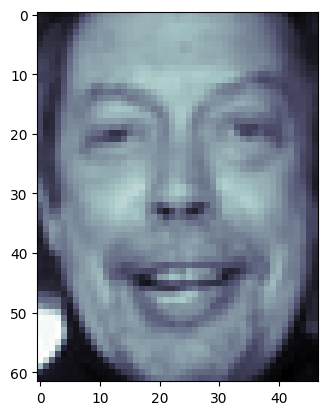

In [3]:
N,y,x = data.images.shape
print('Obtenemos {} imágenes de tamaño: {} x {}.'.format(N,x,y))
data_faces = data.data[0].reshape(y,x)
print('Por ejemplo:')
imshow(np.asarray(data_faces),cmap=plt.cm.bone);

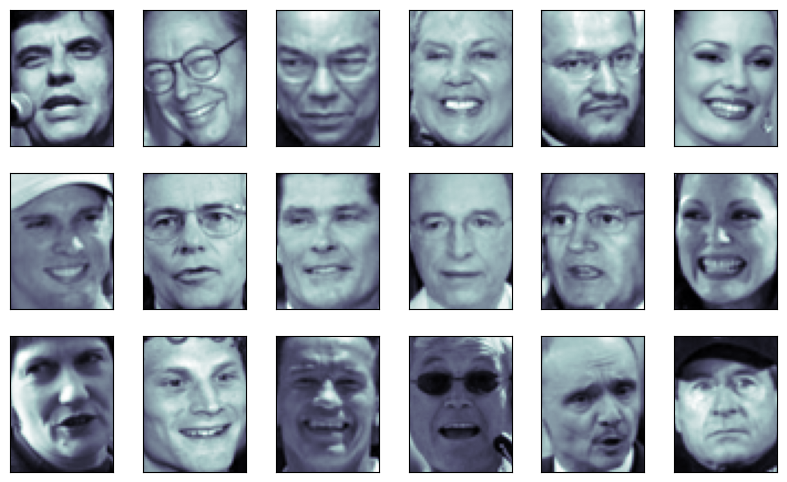

In [4]:
fig = plt.figure(figsize=(10, 6))

sample = np.random.choice(N, size=20, replace=False)
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(data.images[sample[i]], cmap=plt.cm.bone)

# Algoritmo de "Eigenfaces" 


Para hacer la generación de las eigenfaces utilizaremos la tecnica de de PCA(Análisis de componentes principales), este método reduce la dimensionalidad de un espacio vectorial en este caso de 2914 dimensiones proyectando los vectores en los vectores propios de la matriz de covarianza dada por un conjunto de entrenamiento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
        data.target, random_state=0)
#Hacemos la partición de los datos en datos de entrenamiento y de prueba

print("Datos de entrenamiento :",X_train.shape[0])
print("Datos de prueba:", X_test.shape[0])

Datos de entrenamiento : 9924
Datos de prueba: 3309


Cara promedio de los datos:


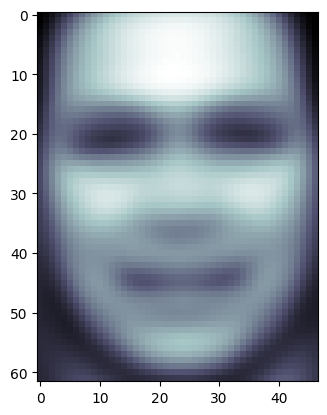

In [6]:
# Reducimos la dimensionalidad con la librería de scikit learn

n=300;
pca = decomposition.PCA(n_components=n, whiten=True)
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(data.images[0].shape), cmap=plt.cm.bone);
print("Cara promedio de los datos:")

Podemos ver algunos valores propios con la menor varianza:


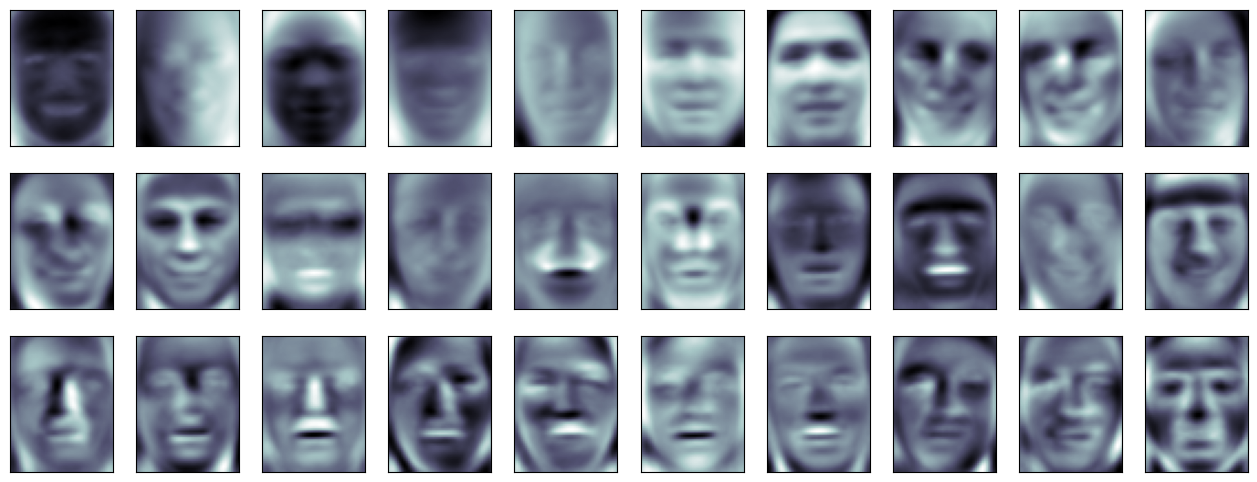

In [7]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(y,x),
              cmap=plt.cm.bone)
print("Podemos ver algunos valores propios con la menor varianza:")

## Eigenfaces en mi cara.

Podemos ver en un ejemplo como funciona, en este caso utilizaremos una foto de mi cara para verlo.

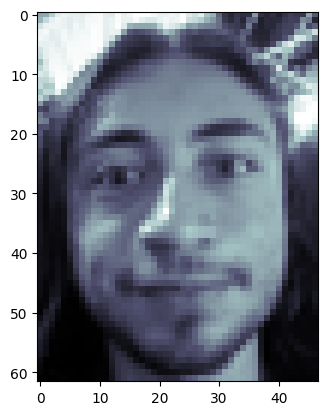

In [8]:
image = Image.open('yo.jpeg').resize((x,y))
image_numpy = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY).flatten()
imshow(np.asarray(image_numpy.reshape(y,x)),cmap=plt.cm.bone);
#Se pasa la imagen escala de grises y se adapta al tamaño del dataset

Para transformar la foto la función de scikit learn halla la diferencia con la cara promedio y proyecta la imagen en los vectores propios o eigenfaces. De esta manera podemos reconstruir la imagen con los pesos de cada valor de la base.

Imagen reconstruida:


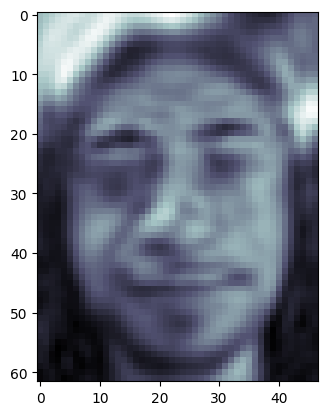

In [9]:
reduced_vector=pca.transform(image_numpy.reshape(1, -1))  #Aplica la transformación
reconstruction=pca.inverse_transform(reduced_vector)      #Recupera una aproximación de la imagen
imshow(reconstruction.reshape(y,x),cmap=plt.cm.bone)
print("Imagen reconstruida:")

In [10]:
index=np.arange(n)
weight=np.abs(reduced_vector)
index=index[weight.argsort()] #Ordena los indices de acuerdo al peso en la imagen

Las eigenfaces con mayor peso para la foto son las siguientes:


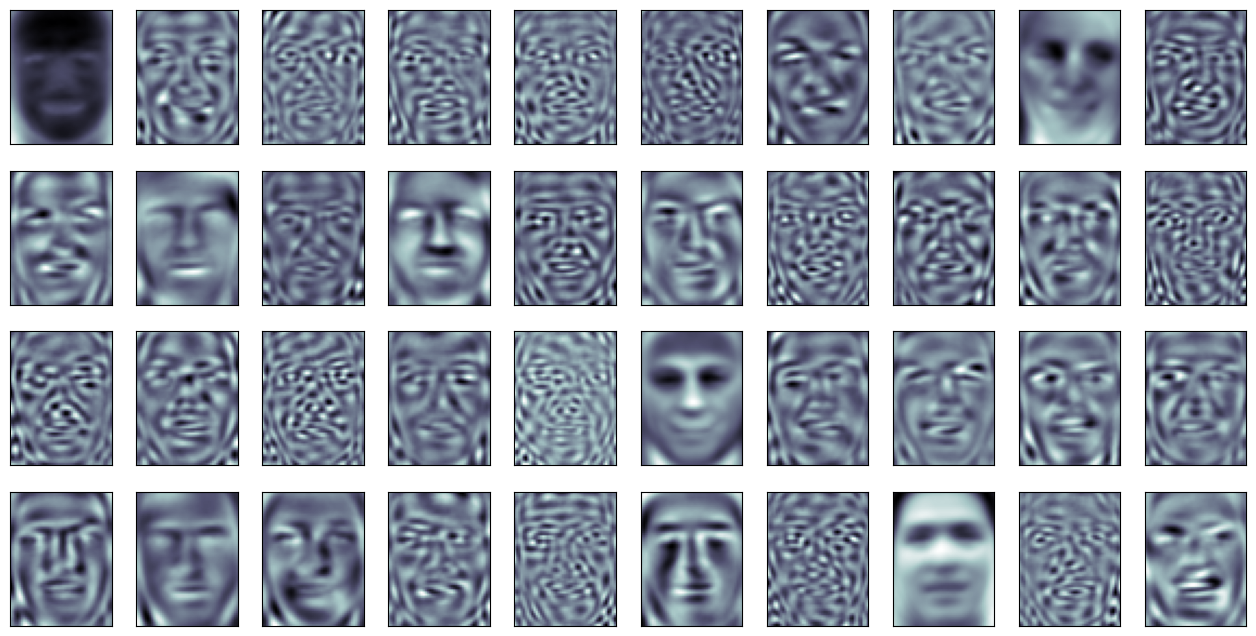

In [11]:
fig = plt.figure(figsize=(16, 8))

adjust=lambda f: f.reshape(y,x)
comp=np.apply_along_axis(adjust,axis=1,arr=pca.components_)
for i in range(1,41):
    ax = fig.add_subplot(4, 10, i , xticks=[], yticks=[])
    ax.imshow(comp[index[0][-i]],
              cmap=plt.cm.bone)
print("Las eigenfaces con mayor peso para la foto son las siguientes:")

Las cara de la base con menor peso en la imagen:


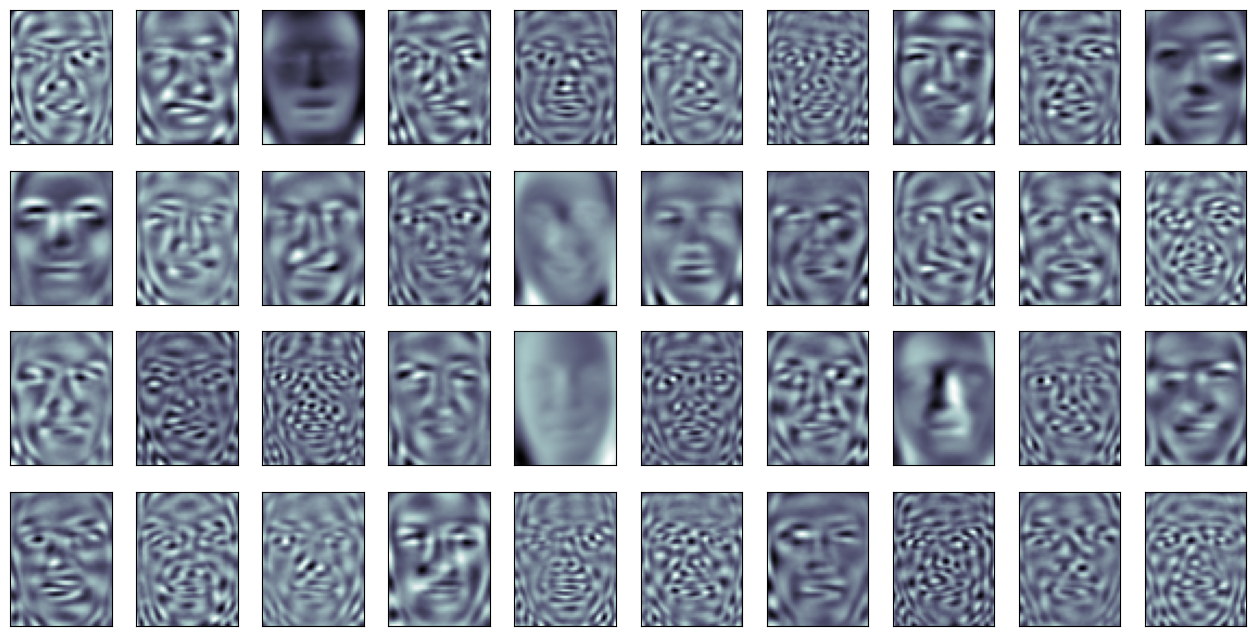

In [12]:
fig = plt.figure(figsize=(16, 8))

adjust=lambda f: f.reshape(y,x)
comp=np.apply_along_axis(adjust,axis=1,arr=pca.components_)
for i in range(1,41):
    ax = fig.add_subplot(4, 10, i , xticks=[], yticks=[])
    ax.imshow(comp[index[0][i]],
              cmap=plt.cm.bone)
print("Las cara de la base con menor peso en la imagen:")